# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of 150 samples of iris flowers, each belonging to one of three species: Iris setosa, Iris versicolor, and Iris virginica. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

##### Target Variable:
- **Species**: The species of the iris flower, which can take one of the following values:
  - 0: Iris setosa
  - 1: Iris versicolor
  - 2: Iris virginica

In [4]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [5]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Bind the disease progression (diabetes target) to the DataFrame
iris_df['species'] = iris_data.target


# Display the DataFrame
iris_df

#Your code here ... 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


> 150 rows x 5 cols

#### **Question 2:** 
#### Data-visualization

Create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


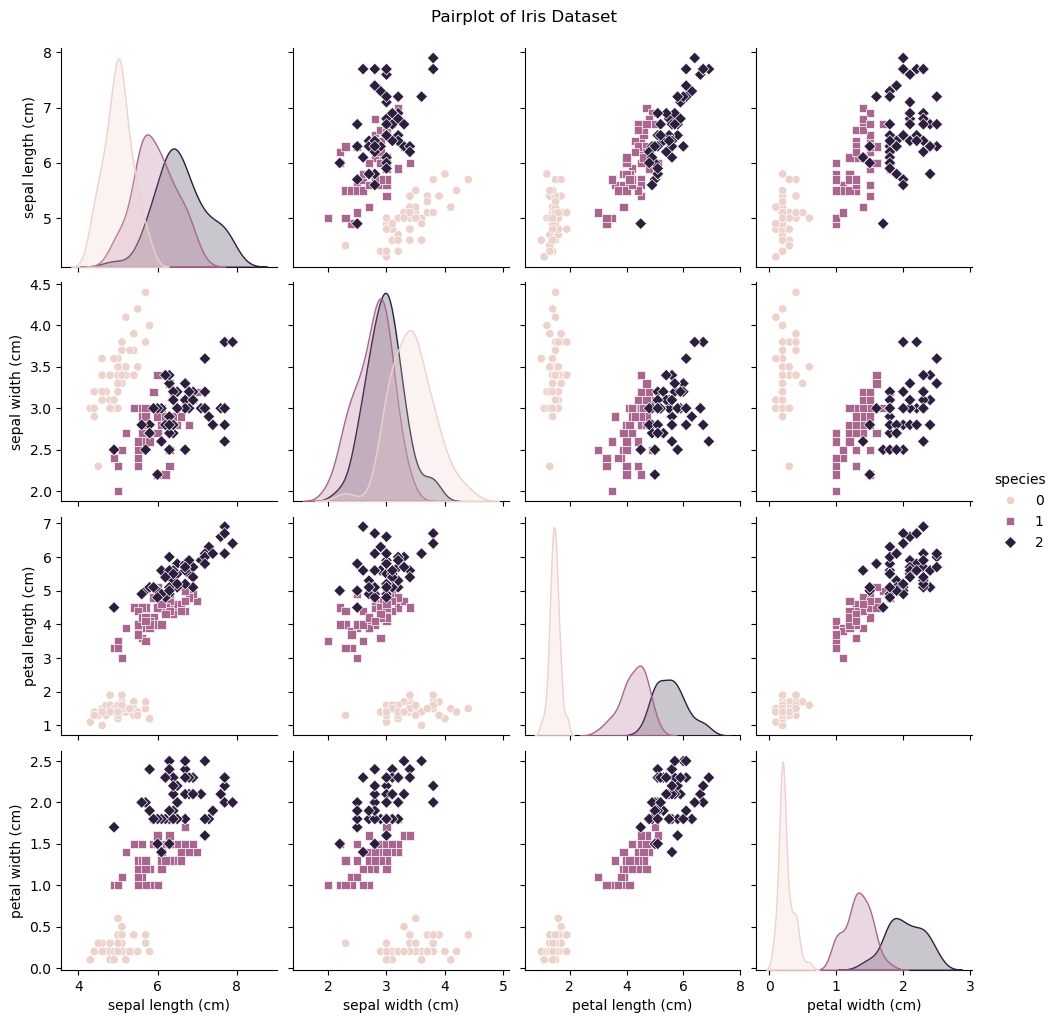

<Axes: >

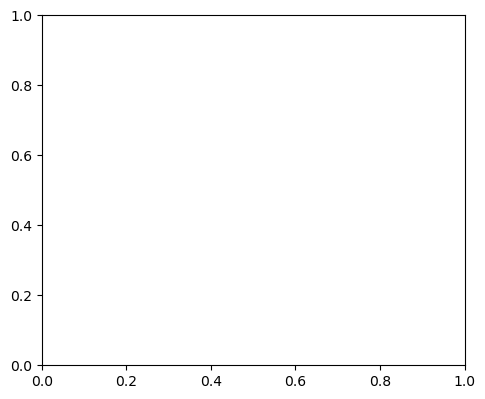

In [6]:
# Pairplot to visualize relationships between all pairs of features
sns.pairplot(iris_df, hue="species", markers=["o", "s", "D"], diag_kind="kde")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Create individual scatter plots to visualize relationships between features
plt.figure(figsize=(12, 10))

# Sepal Length vs Sepal Width
plt.subplot(2, 2, 1)

#### **Question 3:** 
#### Data cleaning

In [7]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (excluding the species column)
scaled_features = scaler.fit_transform(iris_df.iloc[:, :-1])

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Add the species column back to the scaled DataFrame
scaled_iris_df['species'] = iris_df['species'].values

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

> Standardizing features before applying K-Means ensures that all variables contribute equally to the distance calculations, preventing features with larger scales from dominating the clustering process. Without standardization, K-Means may produce biased or misleading clusters, as unscaled features can disproportionately affect the results.

#### **Question 4:** 
#### K-means clustering 
Apply the K-Means clustering algorithm to the Iris dataset.
Choose the number of clusters (K=3, since there are three species) and fit the model.
Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [8]:
# Bind the species target to the DataFrame for reference
iris_df['species'] = iris_data.target

# Step 1: Apply K-Means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_df.drop(columns=['species']))  # Fit on the feature data only (excluding species)

# Step 2: Assign the cluster labels to the original data
iris_df['cluster'] = kmeans.labels_

# Display the updated DataFrame with the cluster labels
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  cluster  
0        0        1  
1        0        1  
2        0        1  
3        0        1  
4        0        1  


c:\Users\brigi\anaconda3\envs\dsi_brigitte\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Discuss the results of the K-Means clustering. How well did the clusters match the true species?

> The K-Means clustering algorithm assigned three clusters based on the feature space of the Iris dataset. The clusters align reasonably well with the true species, especially for **Iris Setosa**, which is typically well-separated from the others. However, there may be some overlap or misclassification between **Iris Versicolor** and **Iris Virginica**, as they share more similar features.


#### **Question 5:** 
#### Bootstrapping 

 Implement bootstrapping on the mean of one of the sepal or petal measurement variables (e.g., Sepal Length, Petal Width) to assess the stability of the mean estimate. Generate 1000 bootstrap samples, calculate the mean for each sample, and compute a 95% confidence interval to evaluate the variability in the estimate.

In [9]:
# Choose the variable (Sepal Length)
sepal_length = iris_df['sepal length (cm)']

# Number of bootstrap samples
n_bootstrap = 1000

# Array to store the mean of each bootstrap sample
bootstrap_means = np.zeros(n_bootstrap)

# Perform bootstrapping
for i in range(n_bootstrap):
    # Generate a bootstrap sample (random sampling with replacement)
    bootstrap_sample = np.random.choice(sepal_length, size=len(sepal_length), replace=True)
    
    # Calculate and store the mean of the bootstrap sample
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculate the 95% confidence interval
ci_lower = np.percentile(bootstrap_means, 2.5)  # 2.5th percentile
ci_upper = np.percentile(bootstrap_means, 97.5)  # 97.5th percentile

# Display the results
print(f"Bootstrap Mean Estimate: {np.mean(bootstrap_means):.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

Bootstrap Mean Estimate: 5.8411
95% Confidence Interval: [5.7027, 5.9687]


Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the selected variable appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> The bootstrapped mean for **Sepal Length** is 5.8411, with a 95% confidence interval ranging from **5.7027** to **5.9687**. The relatively narrow confidence interval suggests that the mean estimate for Sepal Length is stable and reliable, as the variability between the bootstrapped samples is low. This indicates that the true mean is likely to fall within this range, and the spread of the bootstrapped means shows limited fluctuation, reinforcing the stability of the mean estimate for this variable.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
